In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [78]:
train = pd.read_csv("data/ohe_train_recipes_v1.csv")
test = pd.read_csv("data/ohe_test_recipes_v1.csv")

In [79]:
train.head()

,id,( oz.) tomato sauce,( oz.) tomato paste,(10 oz.) frozen chopped spinach,"(10 oz.) frozen chopped spinach, thawed and squeezed dry",(14 oz.) sweetened condensed milk,(14.5 oz.) diced tomatoes,(15 oz.) refried beans,1% low-fat buttermilk,1% low-fat chocolate milk,...,yuzu,yuzu juice,za'atar,zest,zesty italian dressing,zinfandel,ziti,zucchini,zucchini blossoms,cuisine
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,spanish
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,mexican
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,french
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,chinese
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,italian


In [80]:
train['cuisine'].unique()

array(['spanish', 'mexican', 'french', 'chinese', 'italian',
       'southern_us', 'indian', 'thai', 'cajun_creole', 'jamaican',
       'japanese', 'greek', 'russian', 'irish', 'moroccan', 'korean',
       'filipino', 'vietnamese', 'british', 'brazilian'], dtype=object)

In [81]:
train_ingred_counts = train.drop(columns=['id']).groupby('cuisine').agg(sum)
train_ingred_counts.head()

,( oz.) tomato sauce,( oz.) tomato paste,(10 oz.) frozen chopped spinach,"(10 oz.) frozen chopped spinach, thawed and squeezed dry",(14 oz.) sweetened condensed milk,(14.5 oz.) diced tomatoes,(15 oz.) refried beans,1% low-fat buttermilk,1% low-fat chocolate milk,1% low-fat cottage cheese,...,yukon gold potatoes,yuzu,yuzu juice,za'atar,zest,zesty italian dressing,zinfandel,ziti,zucchini,zucchini blossoms
cuisine,,,,,,,,,,,,,,,,,,,,,
brazilian,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,3,0
british,0,0,0,0,0,0,0,0,0,0,...,8,0,0,0,0,0,0,0,3,0
cajun_creole,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,13,0
chinese,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,30,0
filipino,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,6,0


In [82]:
tfidf = TfidfTransformer()
tfidf.fit(train_ingred_counts)
train_tfidf = pd.DataFrame(data=tfidf.transform(train_ingred_counts).toarray(),
                 index=train_ingred_counts.index,
                 columns=train_ingred_counts.columns)
train_tfidf.head()

,( oz.) tomato sauce,( oz.) tomato paste,(10 oz.) frozen chopped spinach,"(10 oz.) frozen chopped spinach, thawed and squeezed dry",(14 oz.) sweetened condensed milk,(14.5 oz.) diced tomatoes,(15 oz.) refried beans,1% low-fat buttermilk,1% low-fat chocolate milk,1% low-fat cottage cheese,...,yukon gold potatoes,yuzu,yuzu juice,za'atar,zest,zesty italian dressing,zinfandel,ziti,zucchini,zucchini blossoms
cuisine,,,,,,,,,,,,,,,,,,,,,
brazilian,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.002246,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.006126,0.0
british,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.010989,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.003746,0.0
cajun_creole,0.001129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000551,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.006514,0.0
chinese,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000581,0.0,0.0,0.0,0.008300,0.0
filipino,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.002362,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.006441,0.0


In [85]:
n = 2 #Number of components

pca = PCA(n_components = n)
reduced_tfidf = pca.fit_transform(train_tfidf)

In [86]:
k = 4 #Number of clusters wanted

kmeans = KMeans(init='k-means++', n_clusters=k, n_init=20)
kmeans.fit(reduced_tfidf)
clusters = kmeans.predict(reduced_tfidf)

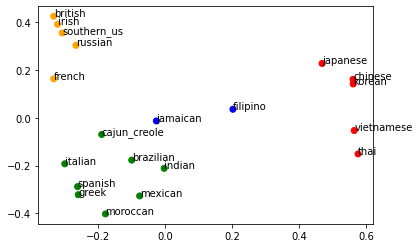

In [95]:
# Plotting Data

cuisine_list = train_tfidf.index.tolist()
colors_list = ['blue','orange','green', 'red', 'pink']
colors = []
labels = []
pc1 = reduced_tfidf[:,0]
pc2 = reduced_tfidf[:,1]

for i in range(len(cuisine_list)):
    colors.append(colors_list[clusters[i]])
    
plt.scatter(pc1, pc2, c = colors)

for i, label in enumerate(cuisine_list):
    plt.text(pc1[i], pc2[i],label)

plt.show()

# Using the Cleaned Data

In [96]:
train = pd.read_csv("data/ohe_train_recipes_v2.csv")
test = pd.read_csv("data/ohe_test_recipes_v2.csv")

In [97]:
train_ingred_counts = train.drop(columns=['id']).groupby('cuisine').agg(sum)
tfidf = TfidfTransformer()
tfidf.fit(train_ingred_counts)
train_tfidf = pd.DataFrame(data=tfidf.transform(train_ingred_counts).toarray(),
                 index=train_ingred_counts.index,
                 columns=train_ingred_counts.columns)


In [112]:
n = 2 #Number of components
pca = PCA(n_components = n)
reduced_tfidf = pca.fit_transform(train_tfidf)

k = 3 #Number of clusters wanted
kmeans = KMeans(init='k-means++', n_clusters=k, n_init=20)
kmeans.fit(reduced_tfidf)
clusters = kmeans.predict(reduced_tfidf)

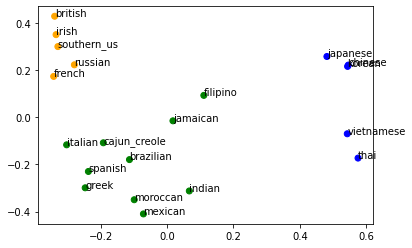

In [113]:
# Plotting Data

cuisine_list = train_tfidf.index.tolist()
colors_list = ['blue','orange','green', 'red', 'pink','purple']
colors = []
labels = []
pc1 = reduced_tfidf[:,0]
pc2 = reduced_tfidf[:,1]

for i in range(len(cuisine_list)):
    colors.append(colors_list[clusters[i]])
    
plt.scatter(pc1, pc2, c = colors)

for i, label in enumerate(cuisine_list):
    plt.text(pc1[i], pc2[i],label)

plt.show()

In [108]:
def compute_clusters_and_inertias(data, max_clusters=8, min_clusters=1):
    clusters = []
    inertias = []
    cluster_sizes = range(min_clusters,max_clusters+1)
    for k in cluster_sizes:
        cluster = KMeans(init='k-means++', n_clusters=k, n_init=20).fit(data)
        clusters.append(cluster)
        inertias.append(cluster.inertia_)
    return list(cluster_sizes), clusters, inertias 


def plot_cluster_inertias(cluster_sizes, interias):
    fig, ax = plt.subplots()
    plt.plot(cluster_sizes, interias, marker='o')
    ax.set_title("Inertia by Number of KMeans Clusters")
    plt.xlabel("# of Clusters")
    plt.ylabel("Inertia")
    return fig, ax

In [109]:
cluster_sizes, cluster_lists, inertias = compute_clusters_and_inertias(reduced_tfidf)

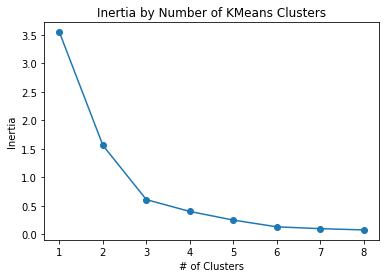

In [111]:
cluster_sizes, cluster_lists, inertias = compute_clusters_and_inertias(reduced_tfidf)
plot_cluster_inertias(cluster_sizes, inertias);

Try computing the clustering in high dimensions, and *then* projecting using PCA for visualization

In [120]:
n = 2 #Number of components
pca = PCA(n_components = n)
reduced_tfidf = pca.fit_transform(train_tfidf)

k = 6 #Number of clusters wanted
kmeans = KMeans(init='k-means++', n_clusters=k, n_init=20)
kmeans.fit(train_tfidf)
clusters = kmeans.predict(train_tfidf)

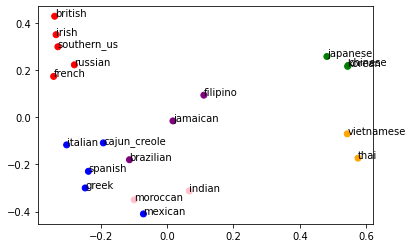

In [121]:
# Plotting Data

cuisine_list = train_tfidf.index.tolist()
colors_list = ['blue','orange','green', 'red', 'pink','purple']
colors = []
labels = []
pc1 = reduced_tfidf[:,0]
pc2 = reduced_tfidf[:,1]

for i in range(len(cuisine_list)):
    colors.append(colors_list[clusters[i]])
    
plt.scatter(pc1, pc2, c = colors)

for i, label in enumerate(cuisine_list):
    plt.text(pc1[i], pc2[i],label)

plt.show()

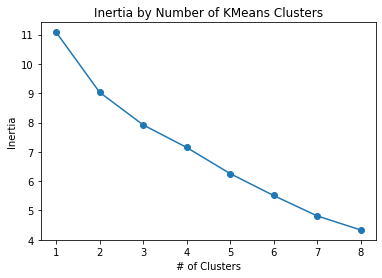

In [117]:
cluster_sizes, cluster_lists, inertias = compute_clusters_and_inertias(train_tfidf)
plot_cluster_inertias(cluster_sizes, inertias);

Want to explore which cuisines are closest, so use hierarchical clustering

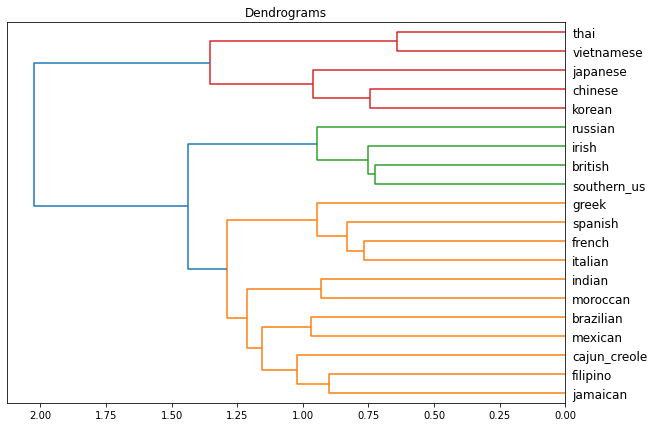

In [251]:
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = dendrogram(linkage(train_tfidf, method='ward'),
                      labels=train_tfidf.index.tolist(), 
                      truncate_mode=None,
                      orientation="left", 
                      color_threshold=1.4,
                      count_sort="descending")

In [246]:
from sklearn.cluster import AgglomerativeClustering

In [247]:
cluster_model = AgglomerativeClustering(n_clusters=3)
agg_clusters = cluster_model.fit_predict(train_tfidf)

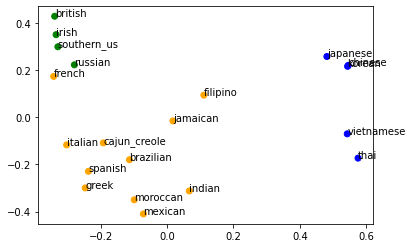

In [248]:
# Plotting Data

cuisine_list = train_tfidf.index.tolist()
colors_list = ['blue','orange','green', 'red', 'pink','purple']
colors = []
labels = []
pc1 = reduced_tfidf[:,0]
pc2 = reduced_tfidf[:,1]

for i in range(len(cuisine_list)):
    colors.append(colors_list[agg_clusters[i]])
    
plt.scatter(pc1, pc2, c = colors)

for i, label in enumerate(cuisine_list):
    plt.text(pc1[i], pc2[i],label)

plt.show()

## Clustering/PCA on Encoded Recipes

,id,1% cottage cheese,1% milk,2% reduced-fat milk,33% less sodium ham,Alfredo sauce,Amaretti Cookies,American cheese,Anaheim chile,Angostura bitters,...,yolk,yucca,yukon gold,yukon gold potatoes,yuzu,zest,zesty italian dressing,ziti,zucchini,cuisine
0,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,italian
1,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,indian
2,27,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,mexican
3,33,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,mexican
4,67,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,irish
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,49668,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,italian
3996,49670,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,mexican
3997,49683,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,brazilian
3998,49703,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,russian
